# CIS 731 ANN - ABHIRAJ SINGH (598879585)

In [ ]:
#import the libraries required for the tasks

import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import History
from collections import Iterable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
#to load and run the dataset locally
 
df = pd.read_excel('Concrete_Data.xls',header=0)
print(df.shape)
df.head(5)

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [ ]:
#check for any NA values

lst = df.columns
def count_na(x):    
    for i in lst:
        return df[x].isnull().any()
obj1 = count_na(lst)
obj1

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [ ]:
#Splitting into X and Y i.e. input and output variables respectively
x = df.loc[:,'Cement (component 1)(kg in a m^3 mixture)':'Age (day)']
y = df.iloc[:,8]

In [ ]:
#normalizing the dataset 
sc = StandardScaler()
x = sc.fit_transform(x)

#splitling the dataset into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=8)

In [ ]:
x_train.shape[0]

721

In [ ]:
#create a timehistory class to get a time for building a network
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In the below section we will see how increasing the number of weights affects the neural network

## MODEL 1

In [ ]:
#create a d-d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model1 = Sequential()
model1.add(Dense(8, input_dim = 8, activation = 'sigmoid'))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='sgd')

model1.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))



CPU times: user 996 ms, sys: 42.1 ms, total: 1.04 s
Wall time: 990 ms


In [ ]:
print(model1.summary())
train_mse1 = history.history.get('loss')
val_mse1 = history.history.get('val_loss')
time_n1 = list(time_callback.times)
print('Total time taken ',sum(time_n1))
print(train_mse1)
print(val_mse1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  0.9092552661895752
[1576.264404296875, 1423.8665771484375, 1286.851806640625, 1156.6962890625, 1029.17333984375, 903.9701538085938, 784.1680908203125, 673.9042358398438, 576.2836303710938, 492.97381591796875, 424.3376770019531, 369.5471496582031, 326.7778625488281, 293.69830322265625, 268.00665283203125, 247.74276733398438, 231.38186645507812, 217.80738830566406, 206.23745727539062, 196.14501953125, 187.18496704101562, 179.1348114013672, 171.8495635986328, 165.2300262451172, 159.2026519775390

# MODEL 2

In [ ]:
#create a d-2d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model2 = Sequential()
model2.add(Dense(16, input_dim = 8, activation = 'sigmoid'))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='sgd')

model2.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))



CPU times: user 1 s, sys: 35.2 ms, total: 1.04 s
Wall time: 992 ms


In [ ]:
print(model2.summary())
train_mse2 = history.history.get('loss')
val_mse2 = history.history.get('val_loss')
time_n2 = list(time_callback.times)
print('Total time taken ',sum(time_n2))
print(train_mse2)
print(val_mse2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  0.9043679237365723
[1515.1787109375, 1279.5655517578125, 1079.394287109375, 901.0869750976562, 740.9488525390625, 600.3626708984375, 482.3597412109375, 388.7633361816406, 318.5535583496094, 268.0823059082031, 232.55528259277344, 207.4727783203125, 189.33447265625, 175.71780395507812, 165.0651092529297, 156.41586303710938, 149.1854248046875, 143.01336669921875, 137.66893005371094, 132.9957275390625, 128.881103515625, 125.23904418945312, 122.0009765625, 119.11041259765625, 116.52010345458984,

## MODEL 3

In [ ]:
#create a d-3d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model3 = Sequential()
model3.add(Dense(24, input_dim = 8, activation = 'sigmoid'))
model3.add(Dense(1))

model3.compile(loss='mean_squared_error', optimizer='sgd')

model3.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

CPU times: user 987 ms, sys: 30.2 ms, total: 1.02 s
Wall time: 975 ms


In [ ]:
print(model3.summary())
train_mse3 = history.history.get('loss')
val_mse3 = history.history.get('val_loss')
time_n3 = list(time_callback.times)
print('Total time taken ',sum(time_n3))
print(train_mse3)
print(val_mse3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  0.8878509998321533
[1496.575439453125, 1176.09912109375, 927.2498168945312, 726.0326538085938, 564.5851440429688, 439.7796936035156, 347.9714050292969, 283.467529296875, 239.41966247558594, 209.41000366210938, 188.46385192871094, 173.21905517578125, 161.59791564941406, 152.37359619140625, 144.82489013671875, 138.51455688476562, 133.1619873046875, 128.57456970214844, 124.61175537109375, 121.16573333740234, 118.15100860595703, 115.49835205078125, 113.15093994140625, 111.06168365478516, 109.19

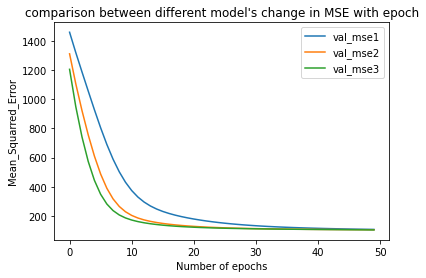

In [ ]:
plt.plot(val_mse1)
plt.plot(val_mse2)
plt.plot(val_mse3)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('comparison between different model\'s change in MSE with epoch')
plt.legend(['val_mse1', 'val_mse2','val_mse3'], loc='upper right')
plt.show()

Based on the above graph we can see that the model with highest number of nodes is able to achieve the minimum MSE with least number of epochs, relative to the other models.

In the below section we will see how increasing the number of layers affect the MSE of neural network.

# INCREASING NUMBER OF LAYERS

# MODEL 1

In [ ]:
#create a d-d-d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model_l1 = Sequential()
model_l1.add(Dense(8, input_dim = 8, activation = 'sigmoid'))
model_l1.add(Dense(8, activation = 'sigmoid'))
model_l1.add(Dense(1))

model_l1.compile(loss='mean_squared_error', optimizer='sgd')

model_l1.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

CPU times: user 1.02 s, sys: 26.9 ms, total: 1.05 s
Wall time: 998 ms


In [ ]:
print(model_l1.summary())
train_mse_l1 = history.history.get('loss')
val_mse_l1 = history.history.get('val_loss')
time_l1 = list(time_callback.times)
print('Total time taken ',sum(time_l1))
print(train_mse_l1)
print(val_mse_l1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  0.8954696655273438
[1603.10693359375, 1449.699951171875, 1313.576171875, 1168.935546875, 1015.2510375976562, 865.9354858398438, 732.630126953125, 619.9049682617188, 528.5533447265625, 457.4789733886719, 404.0693054199219, 364.9629821777344, 336.8287353515625, 316.7980041503906, 302.5945129394531, 292.4972839355469, 285.2433166503906, 279.9244384765625, 275.8966

# MODEL 2

In [ ]:
#create a d-d-d-d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()
history = History()

model_l2 = Sequential()
model_l2.add(Dense(8, input_dim = 8, activation = 'sigmoid'))
model_l2.add(Dense(8, activation = 'sigmoid'))
model_l2.add(Dense(8, activation = 'sigmoid'))
model_l2.add(Dense(1))

model_l2.compile(loss='mean_squared_error', optimizer='sgd')

model_l2.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

CPU times: user 1.07 s, sys: 32.1 ms, total: 1.1 s
Wall time: 1.04 s


In [ ]:
print(model_l2.summary())
train_mse_l2 = history.history.get('loss')
val_mse_l2 = history.history.get('val_loss')
time_l2 = list(time_callback.times)
print('Total time taken ',sum(time_l2))
print(train_mse_l2)
print(val_mse_l2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  0.9413566589355469
[1498.902587890625, 1283.2452392578125, 1083.02197265625, 894.7217407226562, 732.923095703125, 604.5943603515625, 507.5687561035156, 436.7124328613281, 386.55816650390625, 351.9002685546875, 328.298583984375, 312

# MODEL 3

In [ ]:
#create a d-d-d-d-d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()
history = History()

model_l3 = Sequential()
model_l3.add(Dense(8, input_dim = 8, activation = 'sigmoid'))
model_l3.add(Dense(8, activation = 'sigmoid'))
model_l3.add(Dense(8, activation = 'sigmoid'))
model_l3.add(Dense(8, activation = 'sigmoid'))
model_l3.add(Dense(1))

model_l3.compile(loss='mean_squared_error', optimizer='sgd')

model_l3.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

CPU times: user 1.32 s, sys: 28.9 ms, total: 1.35 s
Wall time: 1.29 s


In [ ]:
print(model_l3.summary())
train_mse_l3 = history.history.get('loss')
val_mse_l3 = history.history.get('val_loss')
time_l3 = list(time_callback.times)
print('Total time taken ',sum(time_l3))
print(train_mse_l3)
print(val_mse_l3)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  1.1905553340911865
[1628.605712890625, 1442.134765625, 1286.9454345703125, 1130.2431640625, 969.044

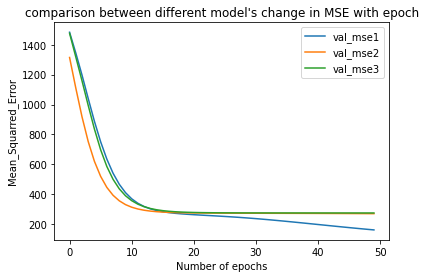

In [ ]:
plt.plot(val_mse_l1)
plt.plot(val_mse_l2)
plt.plot(val_mse_l3)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('comparison between different model\'s change in MSE with epoch')
plt.legend(['val_mse1', 'val_mse2','val_mse3'], loc='upper right')
plt.show()

The above graph shows that model with 3 layers is able to achieve least MSE with less number of epochs, relative to models with 2 and 4 layers.

# COMPUTATION EFFORT





Based on time:

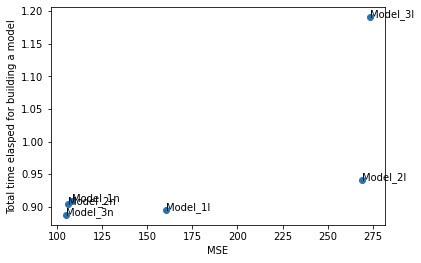

In [ ]:
y = [sum(time_n1), sum(time_n2), sum(time_n3), sum(time_l1), sum(time_l2), sum(time_l3)]
z = [val_mse1[-1],val_mse2[-1],val_mse3[-1],val_mse_l1[-1], val_mse_l2[-1], val_mse_l3[-1]]
n = ['Model_1n', 'Model_2n', 'Model_3n', 'Model_1l', 'Model_2l', 'Model_3l']

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Total time elasped for building a model')
plt.xlabel('MSE')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In the above figure we can see time elasped for building a neural network. The model with more number of layers are taking more time to build, while models with variation only in number of neurons are taking less time to build. Also, models with variation only in number of neuron can get less MSE in less time. This shows that models with less complexity might achieve better performance. This conclusion might be dependent on the datasets. 

[81, 161, 241, 153, 225, 297]


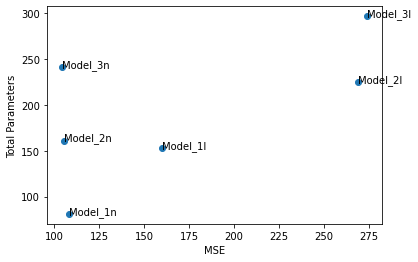

In [ ]:
#we can avoid using epoch for calculation of the computations because we have 50 epochs in every models

y = [model1.count_params(), model2.count_params(), model3.count_params(), model_l1.count_params(), model_l2.count_params(), model_l3.count_params()]
print(y)

z = [val_mse1[-1],val_mse2[-1],val_mse3[-1],val_mse_l1[-1], val_mse_l2[-1], val_mse_l3[-1]]
n = ['Model_1n', 'Model_2n', 'Model_3n', 'Model_1l', 'Model_2l', 'Model_3l']

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Total Parameters')
plt.xlabel('MSE')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

The above graph shows the relationship between total number of parameters and MSE score of the model. In the graph we can see that the model_1n, model_2n and model_3n achieves less MSE. However, the simplest model i.e. model_1n is able to achieve the least MSE and least parameters. 

# PERFORMANCE COMPARISON AFTER LARGE NUMBER OF COMPUTATIONS (EPOCHS)

# MODEL 1

In [ ]:
#create a d-3d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model_c1 = Sequential()
model_c1.add(Dense(24, input_dim = 8, activation = 'sigmoid'))
model_c1.add(Dense(1))

model_c1.compile(loss='mean_squared_error', optimizer='sgd')

model_c1.fit(x_train, y_train, batch_size=721, epochs=100, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

CPU times: user 1.63 s, sys: 64.6 ms, total: 1.69 s
Wall time: 1.59 s


In [ ]:
print(model_c1.summary())
train_mse_c1 = history.history.get('loss')
val_mse_c1 = history.history.get('val_loss')
time_c1 = list(time_callback.times)
print('Total time taken ',sum(time_c1))
print(train_mse_c1)
print(val_mse_c1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
Total time taken  1.4878699779510498
[1596.21240234375, 1246.1123046875, 979.755126953125, 764.9810791015625, 591.834716796875, 457.2218322753906, 357.909423828125, 288.2468566894531, 240.9965362548828, 209.1720733642578, 187.27992248535156, 171.58236694335938, 159.7679901123047, 150.48016357421875, 142.9318084716797, 136.65451049804688, 131.3533935546875, 126.82917785644531, 122.93766021728516, 119.56869506835938, 116.635009765625, 114.06587982177734, 111.80326843261719, 109.79914855957031, 108.01365661621

## MODEL 2

In [ ]:
#create a d-3d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model_c2 = Sequential()
model_c2.add(Dense(24, input_dim = 8, activation = 'sigmoid'))
model_c2.add(Dense(1))

model_c2.compile(loss='mean_squared_error', optimizer='sgd')

model_c2.fit(x_train, y_train, batch_size=721, epochs=200, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

print(model_c2.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
CPU times: user 3.1 s, sys: 115 ms, total: 3.21 s
Wall time: 3.01 s


In [ ]:
train_mse_c2 = history.history.get('loss')
val_mse_c2 = history.history.get('val_loss')
time_c2 = list(time_callback.times)
print('Total time taken ',sum(time_c2))
print(train_mse_c2)
print(val_mse_c2)

Total time taken  2.8603763580322266
[1566.5413818359375, 1229.0245361328125, 970.5521240234375, 762.0014038085938, 593.6780395507812, 462.2606506347656, 364.6008605957031, 295.42437744140625, 247.9247589111328, 215.47230529785156, 192.8204345703125, 176.37493896484375, 163.889892578125, 154.0263671875, 145.99200439453125, 139.3050537109375, 133.6565399169922, 128.83502197265625, 124.68661499023438, 121.0936279296875, 117.9631118774414, 115.21980285644531, 112.80211639404297, 110.6591567993164, 108.74870300292969, 107.03553771972656, 105.49031066894531, 104.08841705322266, 102.80924987792969, 101.63546752929688, 100.5525131225586, 99.54808044433594, 98.61177062988281, 97.73478698730469, 96.90960693359375, 96.12992095947266, 95.39022064208984, 94.68584442138672, 94.0127944946289, 93.36759185791016, 92.74724578857422, 92.14916229248047, 91.57106018066406, 91.01100158691406, 90.46723175048828, 89.9382553100586, 89.4227294921875, 88.9195327758789, 88.42764282226562, 87.94618225097656, 87.4

# MODEL 3

In [ ]:
#create a d-3d-1 neural network with sigmoid activation function
%%time

time_callback = TimeHistory()

history = History()

model_c3 = Sequential()
model_c3.add(Dense(24, input_dim = 8, activation = 'sigmoid'))
model_c3.add(Dense(1))

model_c3.compile(loss='mean_squared_error', optimizer='sgd')

model_c3.fit(x_train, y_train, batch_size=721, epochs=300, verbose=0, callbacks=[history,time_callback],validation_data=(x_val,y_val))

print(model_c3.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None
CPU times: user 5.06 s, sys: 153 ms, total: 5.21 s
Wall time: 4.87 s


In [ ]:
train_mse_c3 = history.history.get('loss')
val_mse_c3 = history.history.get('val_loss')
time_c3 = list(time_callback.times)
print('Total time taken ',sum(time_c3))
print(train_mse_c3)
print(val_mse_c3)

Total time taken  4.632232904434204
[1573.88623046875, 1234.5303955078125, 974.993408203125, 765.24365234375, 595.6979370117188, 463.2929992675781, 364.97998046875, 295.45965576171875, 247.84039306640625, 215.39422607421875, 192.7991485595703, 176.41619873046875, 163.98028564453125, 154.149658203125, 146.13624572753906, 139.46376037597656, 133.82752990722656, 129.01878356933594, 124.8849868774414, 121.30899047851562, 118.19776916503906, 115.4759750366211, 113.08172607421875, 110.96392822265625, 109.08016204833984, 107.39513397216797, 105.87936401367188, 104.50827026367188, 103.26118469238281, 102.12085723876953, 101.07276153564453, 100.10466003417969, 99.20624542236328, 98.36880493164062, 97.5849380493164, 96.84837341308594, 96.15374755859375, 95.49649810791016, 94.87271118164062, 94.27903747558594, 93.71255493164062, 93.17074584960938, 92.65142059326172, 92.1527099609375, 91.67292785644531, 91.2105712890625, 90.764404296875, 90.33321380615234, 89.91602325439453, 89.51192474365234, 89.

Now we can evaluate the performance of each model with increasing epochs. 

In [ ]:
parameters = [model_c1.count_params(), model_c2.count_params(), model_c3.count_params()]
parameters

[241, 241, 241]

In [ ]:
computation = [100*241, 200*241, 300*241]
computation

[24100, 48200, 72300]

In [ ]:
print([val_mse_c1[-1],val_mse_c2[-1],val_mse_c3[-1]])

[92.56841278076172, 75.69865417480469, 67.95528411865234]


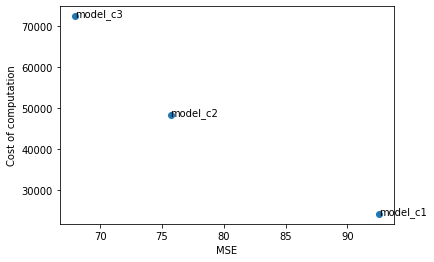

In [ ]:
y = computation

z = [val_mse_c1[-1],val_mse_c2[-1],val_mse_c3[-1]]
n = ['model_c1', 'model_c2', 'model_c3']

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Cost of computation')
plt.xlabel('MSE')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

The above graph shows that the model with most cost of computation is able to achieve the least MSE. This means that for this problem statement increasing the complexity of the model might learn new patterns and can decrease the loss (MSE). 

**Conclusion:**

**Effect of number of neurons:**

For this problem statement (dataset), as we increase the number of weights the model is able to achieve lower MSE. However the selection of the nodes is completely dependent on the problem statement.


**Effect of hidden layers:**

Increasing the number of hidden layers might or might not increase the performance of the model. This is dependent on the complexity of the problem. In this problem the model was able to converge with less number of epochs and less number of hidden layers. Thus, it proves that the problem taken for this specific assignment is not very complex. Also, increasing the number of layers in the neural network increases the computation cost of the network. 


**COST OF COMPUTATION AND PERFORMANCE**

For this specific problem time elapsed to build the model is low for models with less number of layers but shows promising results when we change/increase the neurons. The cost of computation (epochs*parameters) shows that the model with higher computation (more epochs) is able to perform better when compared to the models with lesser epochs for this problem statement. However, the time elapsed and the cost of computation might vary with different problem statement.  




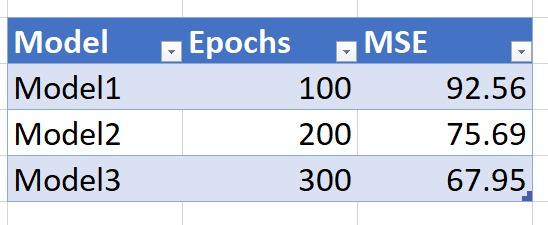

REFERENCES: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength


https://keras.io/getting_started/